In [1]:
import os

project_root = "/Users/nimisha/Desktop/learning/news-reliability-detector/"
os.chdir(project_root)

In [2]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

# local modules
from src.load.load_data import load

In [3]:
spark = SparkSession.builder.appName("NewsReliability").getOrCreate()

23/12/24 15:38:22 WARN Utils: Your hostname, centella.local resolves to a loopback address: 127.0.0.1; using 192.168.70.82 instead (on interface en0)
23/12/24 15:38:22 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/24 15:38:23 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
data = load(spark)

In [5]:
data.show(10)

+--------------------+--------------------+-------+-----------------+------+
|               title|                text|subject|             date|target|
+--------------------+--------------------+-------+-----------------+------+
| Donald Trump Sen...|Donald Trump just...|   News|December 31, 2017|     1|
| Drunk Bragging T...|House Intelligenc...|   News|December 31, 2017|     1|
| Sheriff David Cl...|On Friday, it was...|   News|December 30, 2017|     1|
| Trump Is So Obse...|On Christmas day,...|   News|December 29, 2017|     1|
| Pope Francis Jus...|Pope Francis used...|   News|December 25, 2017|     1|
| Racist Alabama C...|The number of cas...|   News|December 25, 2017|     1|
| Fresh Off The Go...|Donald Trump spen...|   News|December 23, 2017|     1|
| Trump Said Some ...|In the wake of ye...|   News|December 23, 2017|     1|
| Former CIA Direc...|Many people have ...|   News|December 22, 2017|     1|
| WATCH: Brand-New...|Just when you mig...|   News|December 21, 2017|     1|

In [6]:
data.printSchema()

root
 |-- title: string (nullable = true)
 |-- text: string (nullable = true)
 |-- subject: string (nullable = true)
 |-- date: string (nullable = true)
 |-- target: integer (nullable = false)



# Target Distribution

In [7]:
value_count = data.groupBy('target').count()
value_count.show()

+------+-----+
|target|count|
+------+-----+
|     1|23489|
|     0|21418|
+------+-----+



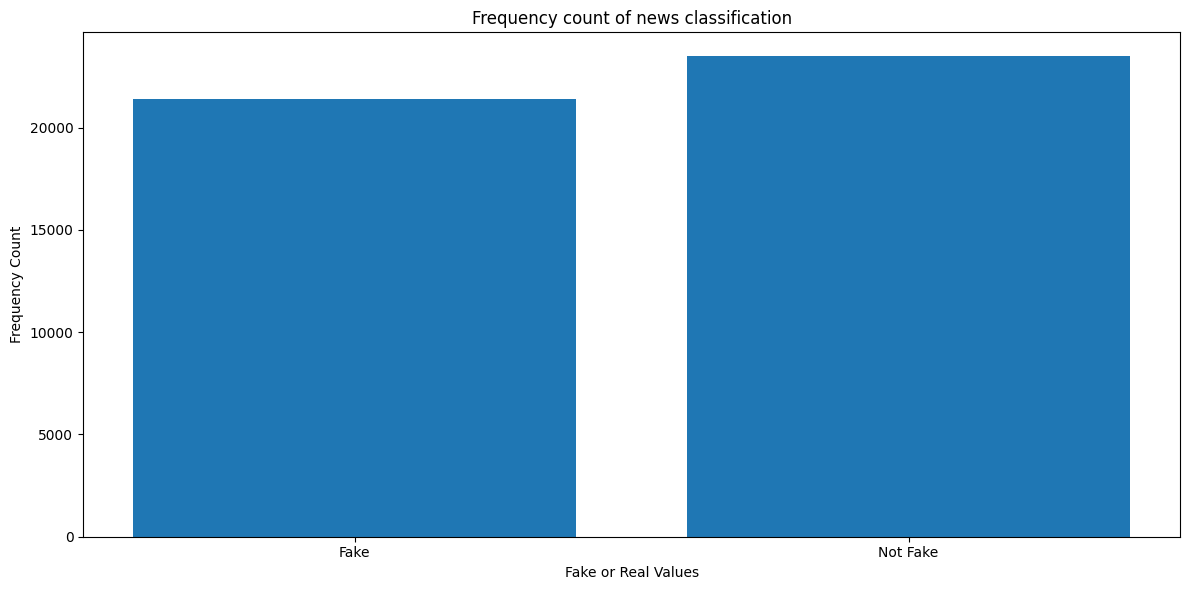

In [11]:
pandas_value_count = value_count.toPandas()

plt.figure(figsize=(12, 6))
plt.bar(pandas_value_count["target"], pandas_value_count["count"])
plt.xlabel("Fake or Real Values")
plt.ylabel("Frequency Count")
plt.title("Frequency count of news classification")
plt.xticks(
    pandas_value_count["target"],
    ["Fake" if x == 0 else "Not Fake" for x in pandas_value_count["target"]],
)
plt.tight_layout()
plt.show()